##Authors Michael Bednar, Tyler Stephens, Ruth Kanyinda, Bigyan Bhandari

##Dataset description
Dataset National Center for Education Statistics ```https://nces.ed.gov/ccd/files.asp```
1. This dataset for increasing the availibility and openess of the United States and The primary purpose of the CCD is to provide basic information on public elementary and secondary schools, local education agencies (LEAs), and state education agencies (SEAs) for each state, the District of Columbia, and the outlying territories with a U.S. relationship.
2. The data is generated by merging available data in the Common Core of Data (CCD) website using its table generator tool. We select the school's name, number of total students in the school, the number of students receiving FRPL and the racial composition of the student population. 
3.For the data to be modeled, we found it necessary to clean and format the data. There were non-numerical values in numerical fields that we had to replace with appropriate values or drop from our data altogether. There was also data for inactive schools that would only add noise to our data and as such we decided to drop those inactive schools from our data. The absence of such schools should not impact any of our models or the outcomes of the models. 
4. This specific dataset is from the years 91-96 in the State of Texas and includes the Agency Name, County Name, Location of the district, District level code, total students, and the number of studets and what racial background they have. And lastly the Revenue and expenditures of the district.

## Goals
## Use the given dataset to evaluate the what values we should use the district wide dataset to try and determine a schools tile 1 eligibility. By using these main predictors we plan on being to evaluate wether or not the given school qualifies as a Title one school district. 

First we must clean the dataset and see what data we have at our desposal

Second we must determine how the data correlates and determine whether or not the data will be useful for determining a schools poverty level and whether or not it is title 1 eligible. 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('91-96_FTD.csv')
df.head()

,Agency Name,State Name [District] Latest available year,Agency ID - NCES Assigned [District] Latest available year,County Name [District],Total Number Operational Schools [Public School] 1995-96,Total Number Operational Schools [Public School] 1994-95,Total Number Operational Schools [Public School] 1993-94,Total Number Operational Schools [Public School] 1992-93,Total Number Operational Schools [Public School] 1991-92,Locale [District] 1995-96,Locale [District] 1994-95,Locale [District] 1993-94,Locale [District] 1992-93,Locale [District] 1991-92,School District Level Code (SCHLEV) [District Finance] 1995-96,School District Level Code (SCHLEV) [District Finance] 1994-95,School District Level Code (SCHLEV) [District Finance] 1991-92,Total Students All Grades (Excludes AE) [District] 1995-96,Total Students All Grades (Excludes AE) [District] 1994-95,Total Students All Grades (Excludes AE) [District] 1993-94,Total Students All Grades (Excludes AE) [District] 1992-93,Total Students All Grades (Excludes AE) [District] 1991-92,Individualized Education Program Students [District] 1995-96,Individualized Education Program Students [District] 1994-95,Individualized Education Program Students [District] 1993-94,Individualized Education Program Students [District] 1992-93,Individualized Education Program Students [District] 1991-92,American Indian/Alaska Native Students [Public School] 1995-96,American Indian/Alaska Native Students [Public School] 1994-95,American Indian/Alaska Native Students [Public School] 1993-94,American Indian/Alaska Native Students [Public School] 1992-93,American Indian/Alaska Native Students [Public School] 1991-92,Asian or Asian/Pacific Islander Students [Public School] 1995-96,Asian or Asian/Pacific Islander Students [Public School] 1994-95,Asian or Asian/Pacific Islander Students [Public School] 1993-94,Asian or Asian/Pacific Islander Students [Public School] 1992-93,Asian or Asian/Pacific Islander Students [Public School] 1991-92,Hispanic Students [Public School] 1995-96,Hispanic Students [Public School] 1994-95,Hispanic Students [Public School] 1993-94,Hispanic Students [Public School] 1992-93,Hispanic Students [Public School] 1991-92,Black or African American Students [Public School] 1995-96,Black or African American Students [Public School] 1994-95,Black or African American Students [Public School] 1993-94,Black or African American Students [Public School] 1992-93,Black or African American Students [Public School] 1991-92,White Students [Public School] 1995-96,White Students [Public School] 1994-95,White Students [Public School] 1993-94,White Students [Public School] 1992-93,White Students [Public School] 1991-92,Total General Revenue (TOTALREV) [District Finance] 1995-96,Total General Revenue (TOTALREV) [District Finance] 1994-95,Total General Revenue (TOTALREV) [District Finance] 1991-92,Total Expenditures (TOTALEXP) [District Finance] 1995-96,Total Expenditures (TOTALEXP) [District Finance] 1994-95,Total Expenditures (TOTALEXP) [District Finance] 1991-92,Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 1995-96,Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 1994-95,Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 1991-92,Total Expenditures (TOTALEXP) per Pupil (V33) [District Finance] 1995-96,Total Expenditures (TOTALEXP) per Pupil (V33) [District Finance] 1994-95,Total Expenditures (TOTALEXP) per Pupil (V33) [District Finance] 1991-92,Total Current Expenditures - Non El-Sec Programs (TNONELSE) per Pupil (V33) [District Finance] 1995-96,Total Current Expenditures (TCURELSC) per Pupil (V33) [District Finance] 1995-96
0,ABBOTT ISD,Texas,4807380,HILL,1,1,1,1,1,7-Rural - outside CBSA/MSA,7-Rural - outside CBSA/MSA,7-Rural - outside CBSA/MSA,7-Rural - outside CBSA/MSA,7-Rural - outside CBSA/MSA,03-Elementary/secondary school system,03-Elementary/secondary school system,03-Elementary/secondary school system,276,276,277,266,227,40,39,49,49,40,1,0,0,0,0,0,0,0,0,0,20,14,12,12,3

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1051 entries, 0 to 1050
Data columns (total 66 columns):
 #   Column                                                                                                  Non-Null Count  Dtype 
---  ------                                                                                                  --------------  ----- 
 0   Agency Name                                                                                             1051 non-null   object
 1   State Name [District] Latest available year                                                             1051 non-null   object
 2   Agency ID - NCES Assigned [District] Latest available year                                              1051 non-null   int64 
 3   County Name [District]                                                                                  1051 non-null   object
 4   Total Number Operational Schools [Public School] 1995-96                                        

In [ ]:
df = df.replace(regex=['†'], value=np.nan)
df = df.replace(regex=['–'], value=np.nan)
df = df.replace(regex=['1-Large city'], value=1)
df = df.replace(regex=['2-Midsize city'], value=2)
df = df.replace(regex=['3-Urban fringe of large city'], value=3)
df = df.replace(regex=['4-Urban fringe of midsize city'], value=4)
df = df.replace(regex=['5-Large town'], value=5)
df = df.replace(regex=['6-Small town'], value=6)
df = df.replace(regex=['7-Rural - outside CBSA/MSA'], value=7)
df = df.replace(regex=['1-Large city'], value=1)
df = df.replace(regex=['1-Large city'], value=1)
df = df.replace(regex=['03-Elementary/secondary school system'], value=3)
df = df.replace(regex=['01-Elementary school system only'], value=1)
df.isna().sum()
df.dropna(inplace=True)
df.head()

,Agency Name,State Name [District] Latest available year,Agency ID - NCES Assigned [District] Latest available year,County Name [District],Total Number Operational Schools [Public School] 1995-96,Total Number Operational Schools [Public School] 1994-95,Total Number Operational Schools [Public School] 1993-94,Total Number Operational Schools [Public School] 1992-93,Total Number Operational Schools [Public School] 1991-92,Locale [District] 1995-96,Locale [District] 1994-95,Locale [District] 1993-94,Locale [District] 1992-93,Locale [District] 1991-92,School District Level Code (SCHLEV) [District Finance] 1995-96,School District Level Code (SCHLEV) [District Finance] 1994-95,School District Level Code (SCHLEV) [District Finance] 1991-92,Total Students All Grades (Excludes AE) [District] 1995-96,Total Students All Grades (Excludes AE) [District] 1994-95,Total Students All Grades (Excludes AE) [District] 1993-94,Total Students All Grades (Excludes AE) [District] 1992-93,Total Students All Grades (Excludes AE) [District] 1991-92,Individualized Education Program Students [District] 1995-96,Individualized Education Program Students [District] 1994-95,Individualized Education Program Students [District] 1993-94,Individualized Education Program Students [District] 1992-93,Individualized Education Program Students [District] 1991-92,American Indian/Alaska Native Students [Public School] 1995-96,American Indian/Alaska Native Students [Public School] 1994-95,American Indian/Alaska Native Students [Public School] 1993-94,American Indian/Alaska Native Students [Public School] 1992-93,American Indian/Alaska Native Students [Public School] 1991-92,Asian or Asian/Pacific Islander Students [Public School] 1995-96,Asian or Asian/Pacific Islander Students [Public School] 1994-95,Asian or Asian/Pacific Islander Students [Public School] 1993-94,Asian or Asian/Pacific Islander Students [Public School] 1992-93,Asian or Asian/Pacific Islander Students [Public School] 1991-92,Hispanic Students [Public School] 1995-96,Hispanic Students [Public School] 1994-95,Hispanic Students [Public School] 1993-94,Hispanic Students [Public School] 1992-93,Hispanic Students [Public School] 1991-92,Black or African American Students [Public School] 1995-96,Black or African American Students [Public School] 1994-95,Black or African American Students [Public School] 1993-94,Black or African American Students [Public School] 1992-93,Black or African American Students [Public School] 1991-92,White Students [Public School] 1995-96,White Students [Public School] 1994-95,White Students [Public School] 1993-94,White Students [Public School] 1992-93,White Students [Public School] 1991-92,Total General Revenue (TOTALREV) [District Finance] 1995-96,Total General Revenue (TOTALREV) [District Finance] 1994-95,Total General Revenue (TOTALREV) [District Finance] 1991-92,Total Expenditures (TOTALEXP) [District Finance] 1995-96,Total Expenditures (TOTALEXP) [District Finance] 1994-95,Total Expenditures (TOTALEXP) [District Finance] 1991-92,Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 1995-96,Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 1994-95,Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 1991-92,Total Expenditures (TOTALEXP) per Pupil (V33) [District Finance] 1995-96,Total Expenditures (TOTALEXP) per Pupil (V33) [District Finance] 1994-95,Total Expenditures (TOTALEXP) per Pupil (V33) [District Finance] 1991-92,Total Current Expenditures - Non El-Sec Programs (TNONELSE) per Pupil (V33) [District Finance] 1995-96,Total Current Expenditures (TCURELSC) per Pupil (V33) [District Finance] 1995-96
0,ABBOTT ISD,Texas,4807380,HILL,1,1,1,1,1,7.0,7.0,7.0,7.0,7.0,3.0,3.0,3,276,276,277,266,227,40,39,49,49,40,1,0,0,0,0,0,0,0,0,0,20,14,12,12,3,6,6,5,2,1,249,256,260,252,223,1721000,1608000,1222000,2454000,1694000,933000,6236,5826,5383,8848,6116,4110,0,5859
1,ABERNATHY ISD,Texas,4807410,HALE,3,3,3,3,3,6.0,6.0,6.0,6.0,6.0,3.0,3.0,3,884,916,921,875,879,156,141,1

In [ ]:
df_Totals = pd.DataFrame()
Total_Schools = df.iloc[:,[4,5,6,7,8]].astype(int).sum(axis=1)
Total_Students = df.iloc[:,[17,18,19,20,21]].astype(int).sum(axis=1)
df_Totals['Agency_Name'] = df['Agency Name']
df_Totals['Agency_ID'] = df['Agency ID - NCES Assigned [District] Latest available year']
df_Totals['County_Name'] = df['County Name [District]']
df_Totals['Total_Schools'] = Total_Schools
df_Totals['Avg_Schools'] = Total_Schools/5
df_Totals = df_Totals.drop(['Total_Schools'], axis=1)
df_Totals['Total_Students'] = Total_Students
df_Totals['Avg_Students'] = Total_Students/5

df_Totals.head()

,Agency_Name,Agency_ID,County_Name,Avg_Schools,Total_Students,Avg_Students
0,ABBOTT ISD,4807380,HILL,1.0,1322,264.4
1,ABERNATHY ISD,4807410,HALE,3.0,4475,895.0
2,ABILENE ISD,4807440,TAYLOR,39.2,97670,19534.0
3,ACADEMY ISD,4807470,BELL,3.0,4571,914.2
4,ADRIAN ISD,4807500,OLDHAM,1.0,501,100.2


In [ ]:
#Total_Schools = df.iloc[:,[4,5,6,7,8]].astype(int).sum(axis=1)
Locale = df.iloc[:,[9,10,11,12,13]].astype(int).sum(axis=1)
District_Lvl = df.iloc[:,[14,15,16]].astype(int).sum(axis=1)
#Total_Students = df.iloc[:,[17,18,19,20,21]].astype(int).sum(axis=1)
Individual_Edu = df.iloc[:,[22,23,24,25,26]].astype(int).sum(axis=1)
Native_American = df.iloc[:,[27,28,29,30,31]].astype(int).sum(axis=1)
Asian_American = df.iloc[:,[32,33,34,35,36]].astype(int).sum(axis=1)
Hispanic_American = df.iloc[:,[37,38,39,40,41]].astype(int).sum(axis=1)
African_American = df.iloc[:,[42,43,44,45,46]].astype(int).sum(axis=1)
Caucasian_American = df.iloc[:,[47,48,49,50,51]].astype(int).sum(axis=1)
Total_Rev = df.iloc[:,[52,53,54]].astype(float).sum(axis=1)
Total_Exp = df.iloc[:,[55,56,57]].astype(float).sum(axis=1)
Total_Rev_PP = df.iloc[:,[58,59,60]].astype(float).sum(axis=1)
Total_Exp_PP = df.iloc[:,[61,62,63]].astype(float).sum(axis=1)
TCE_PP = df.iloc[:,[64,65]].astype(float).sum(axis=1)


df_Totals['District_Lvl'] = District_Lvl
df_Totals['Avg_District_Lvl'] = District_Lvl/3
df_Totals = df_Totals.drop(['District_Lvl'], axis=1)

df_Totals['Locale'] = Locale
df_Totals['Avg_Locale'] = Locale/5
df_Totals = df_Totals.drop(['Locale'], axis=1)

df_Totals['Individual_Edu'] = Individual_Edu
df_Totals['Avg_Individual_Edu'] = Individual_Edu/5
df_Totals = df_Totals.drop(['Individual_Edu'], axis=1)

df_Totals['Native_American'] = Native_American
df_Totals['Avg_Native_American'] = Native_American/5
df_Totals['%_NA'] = df_Totals['Native_American']/df_Totals['Total_Students']
df_Totals = df_Totals.drop(['Native_American'], axis=1)

df_Totals['Asian_American'] = Asian_American
df_Totals['Avg_Asian_American'] = Asian_American/5
df_Totals['%_AsA'] = df_Totals['Asian_American']/df_Totals['Total_Students']
df_Totals = df_Totals.drop(['Asian_American'], axis=1)

df_Totals['Hispanic_American'] = Hispanic_American
df_Totals['Avg_Hispanic_American'] = Hispanic_American/5
df_Totals['%_HA'] = df_Totals['Hispanic_American']/df_Totals['Total_Students']
df_Totals = df_Totals.drop(['Hispanic_American'], axis=1)

df_Totals['African_American'] = African_American
df_Totals['Avg_African_American'] = African_American/5
df_Totals['%_AfA'] = df_Totals['African_American']/df_Totals['Total_Students']
df_Totals = df_Totals.drop(['African_American'], axis=1)

df_Totals['Caucasian_American'] = Caucasian_American
df_Totals['Avg_Caucasian_American'] = Caucasian_American/5
df_Totals['%_CA'] = df_Totals['Caucasian_American']/df_Totals['Total_Students']
df_Totals = df_Totals.drop(['Caucasian_American'], axis=1)

df_Totals['Total_Rev'] = Total_Rev 
df_Totals['Avg_Total_Rev'] = Total_Rev/3
df_Totals = df_Totals.drop(['Total_Rev'], axis=1)

df_Totals['Total_Exp'] = Total_Exp 
df_Totals['Avg_Total_Exp'] = Total_Exp/3
df_Totals = df_Totals.drop(['Total_Exp'], axis=1)

df_Totals['Total_Rev_PP'] = Total_Rev_PP 
df_Totals['Avg_Total_Rev_PP'] = Total_Rev_PP/3
df_Totals = df_Totals.drop(['Total_Rev_PP'], axis=1)

df_Totals['Total_Exp_PP'] = Total_Exp_PP 
df_Totals['Avg_Total_Exp_PP'] = Total_Exp_PP/3
df_Totals = df_Totals.drop(['Total_Exp_PP'], axis=1)

df_Totals['TCE_PP'] = TCE_PP 
df_Totals['Avg_Total_TCE'] = TCE_PP/2
df_Totals = df_Totals.drop(['TCE_PP'], axis=1)

df_Totals.head()

,Agency_Name,Agency_ID,County_Name,Avg_Schools,Total_Students,Avg_Students,Avg_District_Lvl,Avg_Locale,Avg_Individual_Edu,Avg_Native_American,%_NA,Avg_Asian_American,%_AsA,Avg_Hispanic_American,%_HA,Avg_African_American,%_AfA,Avg_Caucasian_American,%_CA,Avg_Total_Rev,Avg_Total_Exp,Avg_Total_Rev_PP,Avg_Total_Exp_PP,Avg_Total_TCE
0,ABBOTT ISD,4807380,HILL,1.0,1322,264.4,3.0,7.0,43.4,0.2,0.000756,0.0,0.000000,12.2,0.046142,4.0,0.015129,248.0,0.937973,1.517000e+06,1.693667e+06,5815.000000,6358.000000,2929.5
1,ABERNATHY ISD,4807410,HALE,3.0,4475,895.0,3.0,6.0,134.8,1.2,0.001341,1.6,0.001788,444.8,0.496983,31.2,0.034860,417.0,0.465922,5.652333e+06,5.116667e+06,6323.333333,5689.666667,2938.5
2,ABILENE ISD,4807440,TAYLOR,39.2,97670,19534.0,3.0,2.0,3259.2,72.6,0.003717,276.6,0.014160,4957.2,0.253773,2005.4,0.102662,12224.8,0.625822,1.031610e+08,1.079307e+08,5281.666667,5532.333333,2790.0
3,ACADEMY ISD,4807470,BELL,3.0,4571,914.2,3.0,2.4,123.0,1.4,0.001531,3.0,0.003282,102.8,0.112448,4.6,0.005032,802.4,0.877707,5.028333e+06,4.664000e+06,5469.333333,5074.333333,2228.0
4,ADRIAN ISD,4807500,OLDHAM,1.0,501,100.2,3.0,7.0,13.0,0.0,0.000000,0.0,0.000000,25.4,0.253493,0.0,0.000000,74.8,0.746507,1.020667e+06,9.373333e+05,10104.000000,9273.000000,4853.0


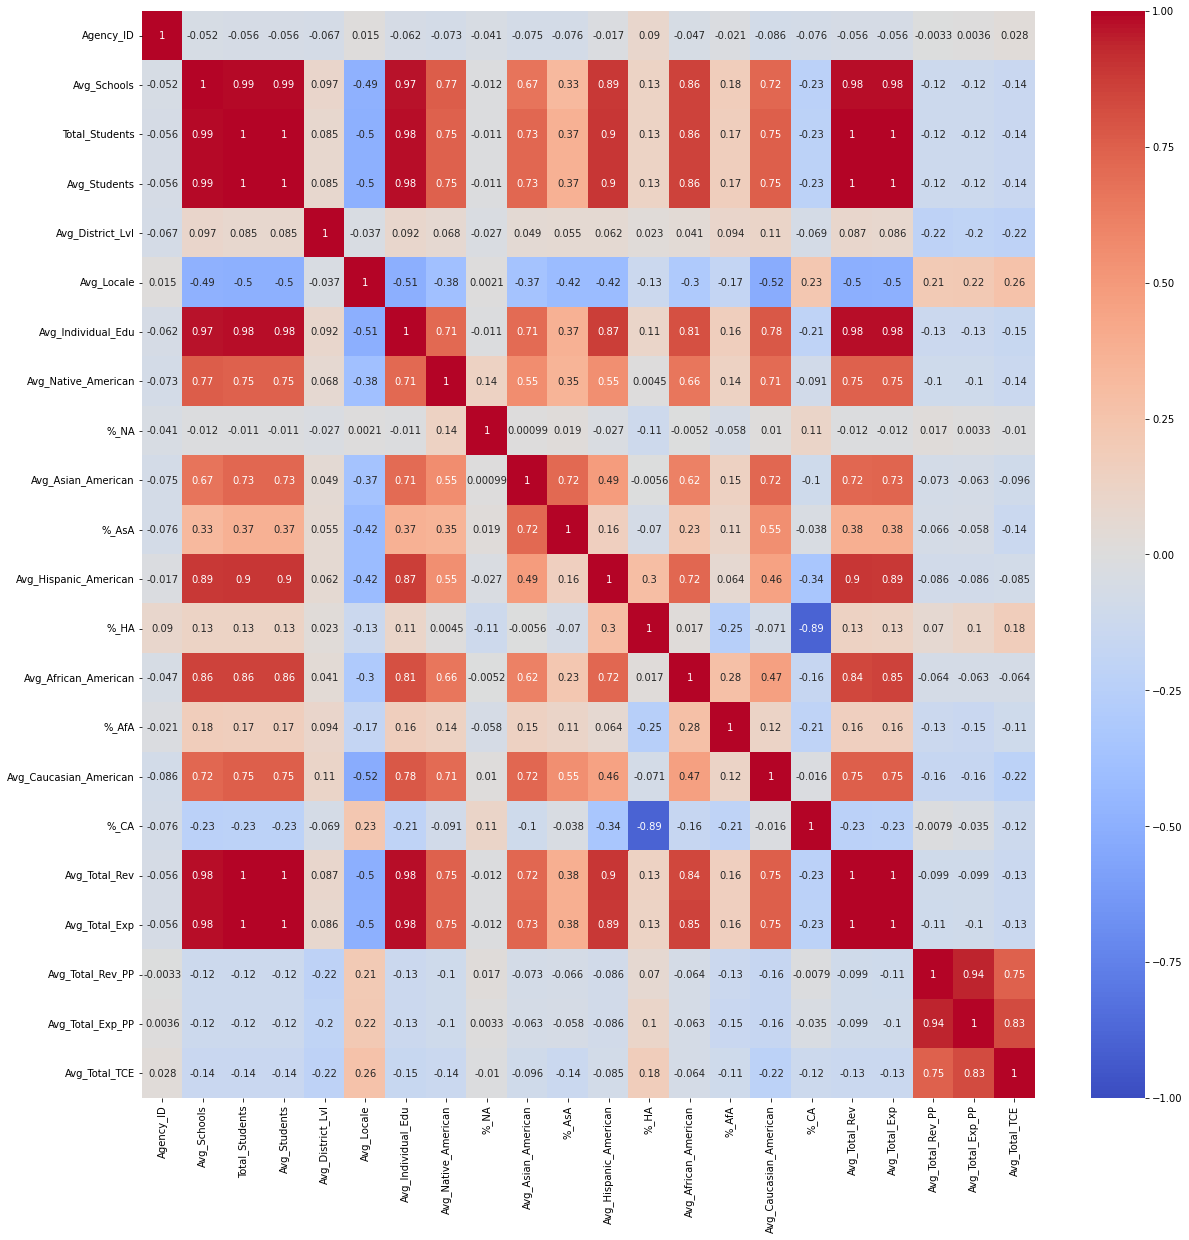

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(df_Totals.corr(),annot=True,cmap='coolwarm',vmin=-1)

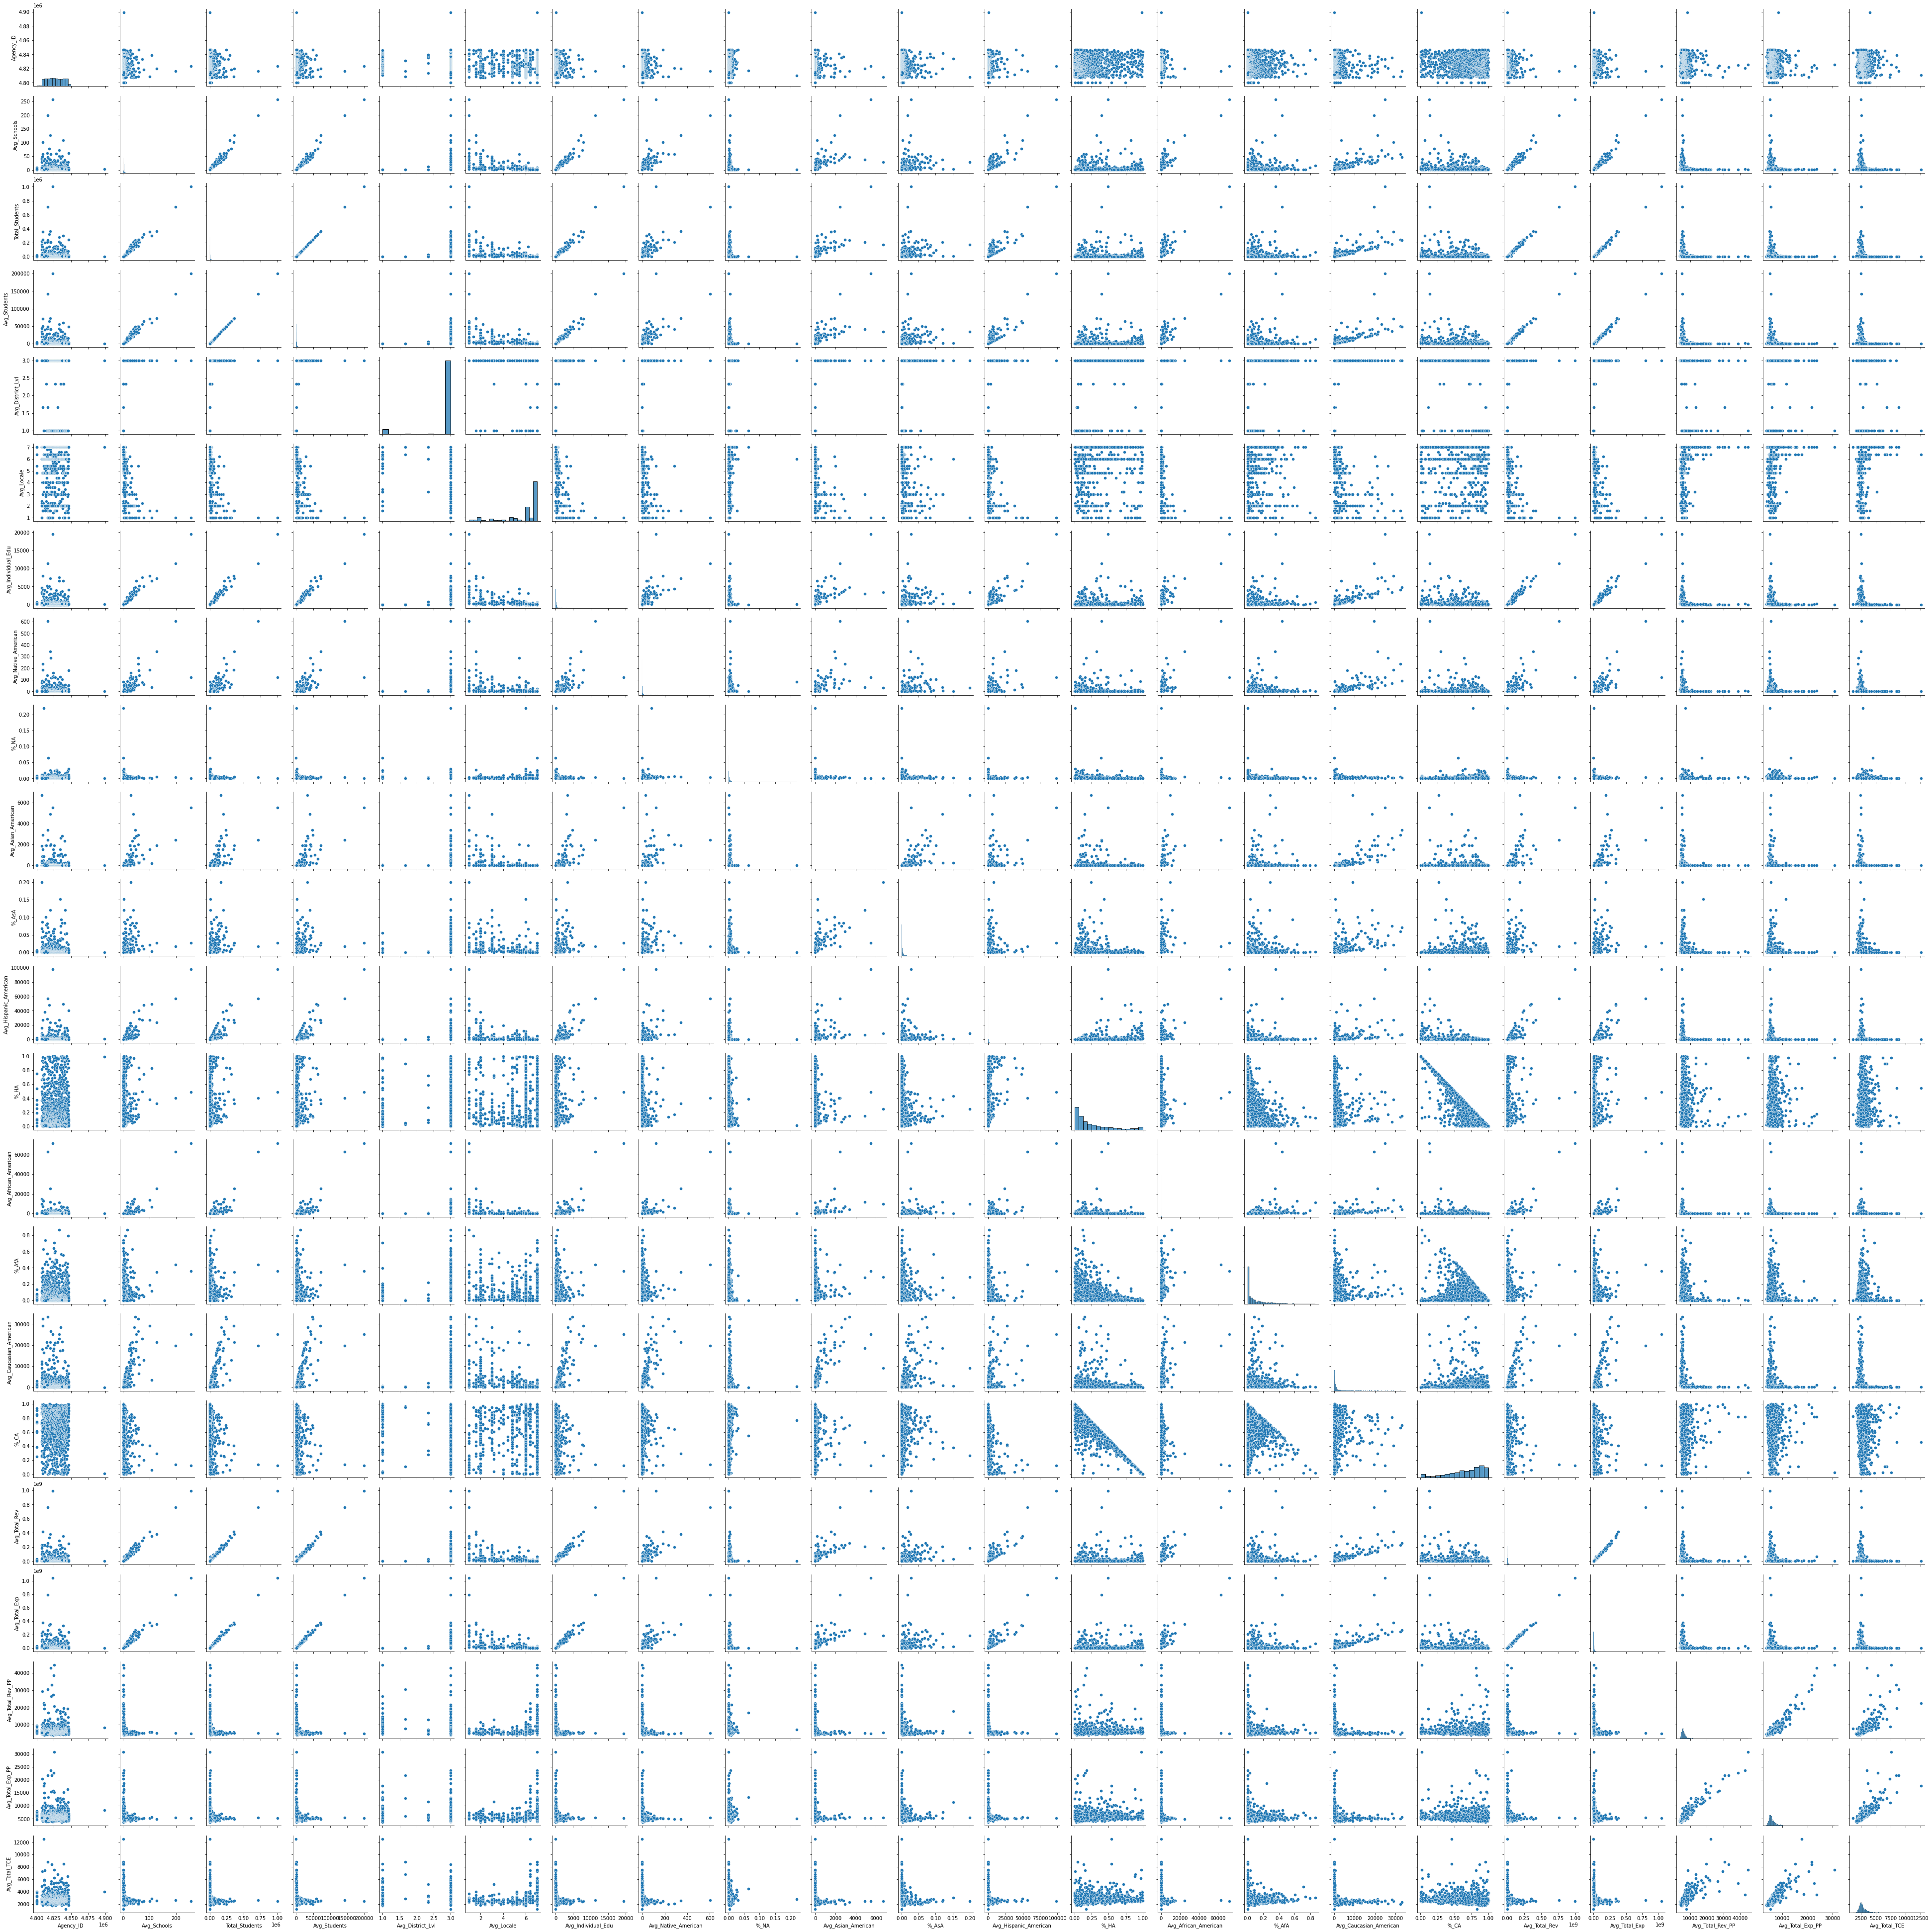

In [ ]:
sns.pairplot(df_Totals)

## Discovery
After cleaning and seperating all the data at hand with the district isd data. We have come to the conclusion that using the data in the district wide datasheet isn't as viable as using the indvidual Texas schools data. Seeing as there is less clear correlation between the data and how its a little more difficult to see whether or not the schools will be title 1 eligible. So for now on we will be just be sticking with the individual highschool dataset identified by the 'S' in the CSV file.